<a href="https://colab.research.google.com/github/DrMelissaFranklin/Docker.dsub/blob/main/Capstone_CO2_Sequestration_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***# Plots of Water and Gas (WAG) cycling during oil extraction to pinpoint dates for Seismic Activity.***


---


# IMPORTANT NOTE from Mel: There are generally not many aberrant events and given the cost of such an event it is not surprising that they are fairly well controlled year after year.
# CO2 gas spikes in pressure occurred in the transport of the anthropogenic CO2 (piped from the fertilizer and ethanol plants in Kansas down to the facilities in the TX panhandle).  *Although it is rare: only about two days eye-balling it, called "High Pressure Pipeline" days, between Jan 1, 2019 and December 2021!*


---


# SALIMA Model (Note from Mel):  Seasonal CO2 above ground (in the atmosphere)declines in winter due to lack of agricultural activity/growing, so it's possible if data were stratified (winter vs non-winter) and the Seasonal Alima model were run, we might see more Percent Change in Gas Rate events...?

---



## Problem Definition


see ppt Dec 6, 2024

## Data Collection/Sources


###Renamed as "TXpanhandle" from SME: /content/.config/TXpanHandle Data - 202102_FINAL.xlsx

## Data Cleaning


###NO cleaning - want nulls to indicate when no WAG cycling

## Exploratory Data Analysis


In [1]:
%pip install -U openpyxl

In [2]:
# Import Necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import openpyxl

In [32]:
# Load and Preprocess Data:

# Load data via path to Excel file
file_path = '/content/.config/TXpanHandle Data - 202102_FINAL.xlsx'

# Option 1: Read all sheets
all_sheets = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

# Access a specific sheet
sheet_SWP = 'SWP_Dashboard thru 2-28-2021'  # Name of desired sheet

#turn that sheet into a dataframe
df_SWP = all_sheets[sheet_SWP]

# Option 2: Read a specific sheet directly
#df = pd.read_excel(file_path, sheet_name=sheet_Date, engine='openpyxl')

# Display the first few rows of the DataFrame
print(df_SWP.head())

        Date  Oil Production (bbls)  Water Production (bbls)  \
0 2014-03-26                 1150.0                      0.0   
1 2014-03-27                    0.0                      0.0   
2 2014-04-01                    0.0                      0.0   
3 2014-04-02                 1321.0                   6833.0   
4 2014-04-03                 1338.0                   7223.0   

   Water Injection (bbls)  Arkalon CO2 (mcf)  Borger CO2 (mcf)  \
0                     0.0                0.0               0.0   
1                     0.0                0.0               0.0   
2                     0.0                0.0               0.0   
3                  6833.0             8594.0            2608.0   
4                  6848.0             8453.0            2381.0   

   Recycle CO2 (mcf)  Flare (mcf)  External Sources (bbls)  \
0                0.0          0.0                      0.0   
1                0.0          0.0                      0.0   
2                0.0          0.

In [4]:
# Set date column as index
df_SWP.set_index(df_SWP['Date'],inplace= True)

In [5]:
df_SWP['Date'] = pd.to_datetime(df_SWP['Date'])

In [6]:
#slice out the 2019 dates
df_2019 = df_SWP[df_SWP['Date'].dt.year == 2019]

In [7]:
df_2019.head()

,Date,Oil Production (bbls),Water Production (bbls),Water Injection (bbls),Arkalon CO2 (mcf),Borger CO2 (mcf),Recycle CO2 (mcf),Flare (mcf),External Sources (bbls),Total Injection (bbls)
Date,,,,,,,,,,
2019-01-01,2019-01-01,1114.397095,5958.703125,5950.0,10946.000000,NaN,11081.000000,0.0,NaN,NaN
2019-01-02,2019-01-02,1427.965820,6706.014648,6699.0,9288.000000,NaN,3164.000000,3866.0,NaN,NaN
2019-01-03,2019-01-03,1467.208496,7820.741699,7808.0,0.000000,NaN,9230.000000,2901.0,NaN,NaN
2019-01-04,2019-01-04,1289.665771,7866.133301,7860.0,10747.000000,NaN,12074.000000,0.0,NaN,NaN
2019-01-05,2019-01-05,1282.938354,8259.702148,8251.0,10347.000977,NaN,11520.000977,0.0,NaN,NaN


In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     365 non-null    datetime64[ns]
 1   Oil Production (bbls)    365 non-null    float64       
 2   Water Production (bbls)  365 non-null    float64       
 3   Water Injection (bbls)   365 non-null    float64       
 4   Arkalon CO2 (mcf)        365 non-null    float64       
 5   Borger CO2 (mcf)         0 non-null      float64       
 6   Recycle CO2 (mcf)        365 non-null    float64       
 7   Flare (mcf)              365 non-null    float64       
 8   External Sources (bbls)  0 non-null      float64       
 9   Total Injection (bbls)   0 non-null      float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 31.4 KB


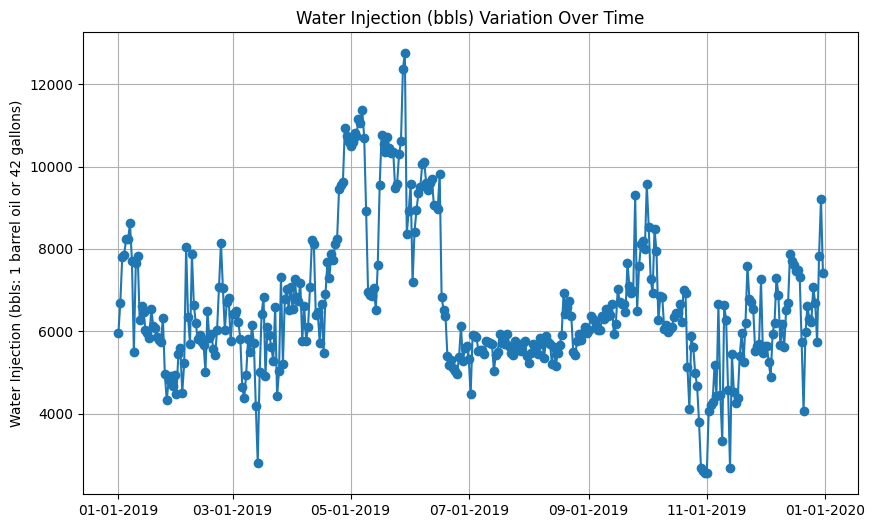

In [9]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the Water Injection (bbls) column against Date
plt.plot(df_2019.index, df_2019['Water Injection (bbls)'], marker='o', linestyle='-')

# Add labels and title:

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # format: Month-Day-Year
plt.ylabel('Water Injection (bbls: 1 barrel oil or 42 gallons)')
plt.title('Water Injection (bbls) Variation Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [20]:
# Access the specific sheet called "Well Tests"
sheet_wells = 'Well Tests'

#turn sheet into a dataframe
df_2019_wells = all_sheets[sheet_wells]

In [21]:
# Display  first few rows of  DataFrame for Well Tests
print(df_2019_wells.head())

                Unit Name           Type Effective Date  Gas Volume Override  \
Effective Date                                                                 
2017-03-14      FWU #1802  direct volume     2017-03-14                  0.0   
2017-07-05       FWU #904  direct volume     2017-07-05                  0.5   
2017-11-03      FWU #2008  direct volume     2017-11-03                  0.0   
2017-11-26      FWU #1501  direct volume     2017-11-26                  0.0   
2018-04-21       FWU #701  direct volume     2018-04-21                343.0   

                Recovered Lift Gas  Oil/Emulsion Volume Override  \
Effective Date                                                     
2017-03-14                     NaN                          22.0   
2017-07-05                     NaN                          12.0   
2017-11-03                     NaN                           5.0   
2017-11-26                     NaN                           5.0   
2018-04-21                     

In [22]:
# Access sheet names from excel sheet
sheet_names = all_sheets.keys()

# Print sheet names to confirm
print(sheet_names)

dict_keys(['SWP_Dashboard thru 2-28-2021', 'Daily Prod_Inj & Pressures', 'Monthly Prod_Inj', 'Well Tests', 'Downtimes', 'Water Meters', 'Gas Meters'])


In [23]:
# Set "Effective Date" column as index in dataframe created from sheet "Well Tests"
df_2019_wells.set_index(df_2019_wells['Effective Date'],inplace= True)

In [34]:
df_2019_wells['Effective Date'] = pd.to_datetime(df_2019_wells['Effective Date'])

<ipython-input-34-fefbc2a4c6de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_wells['Effective Date'] = pd.to_datetime(df_2019_wells['Effective Date'])


In [35]:
df_2019_wells = df_2019_wells[['% Change in Gas Rate']]

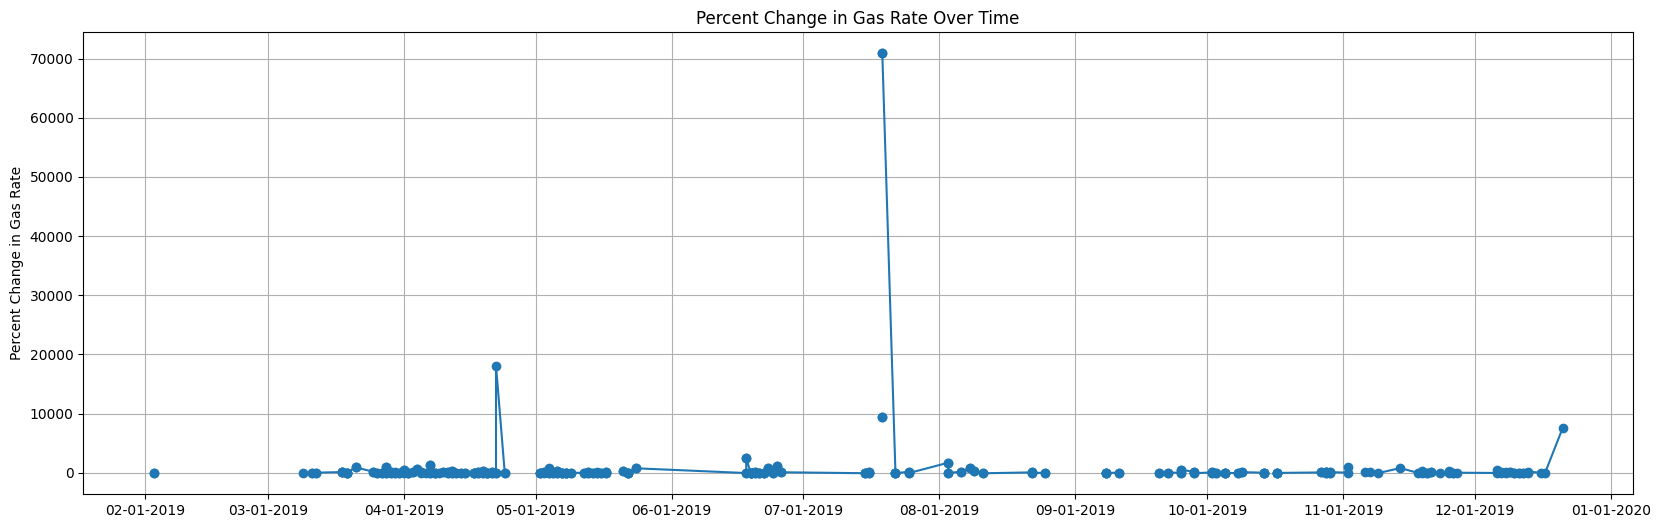

In [36]:
plt.figure(figsize=(20, 6))  # Set the figure size

# % Change in Gas Rate column against Effective Date
plt.plot(df_2019_wells.index, df_2019_wells['% Change in Gas Rate'], marker='o', linestyle='-')

# Add labels and title

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # format: Month-Day-Year
plt.ylabel('Percent Change in Gas Rate')
plt.title('Percent Change in Gas Rate Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [37]:
# Display the DataFrame to verify the changes
print(df_2019_wells.head())

                % Change in Gas Rate
Effective Date                      
2019-01-02                       NaN
2019-01-02                       NaN
2019-01-29                       NaN
2019-02-03                -50.179211
2019-02-03                -50.179211


In [38]:
#slice out the 2019 dates
df_2019_wells = df_wells[df_wells['Effective Date'].dt.year == 2019]

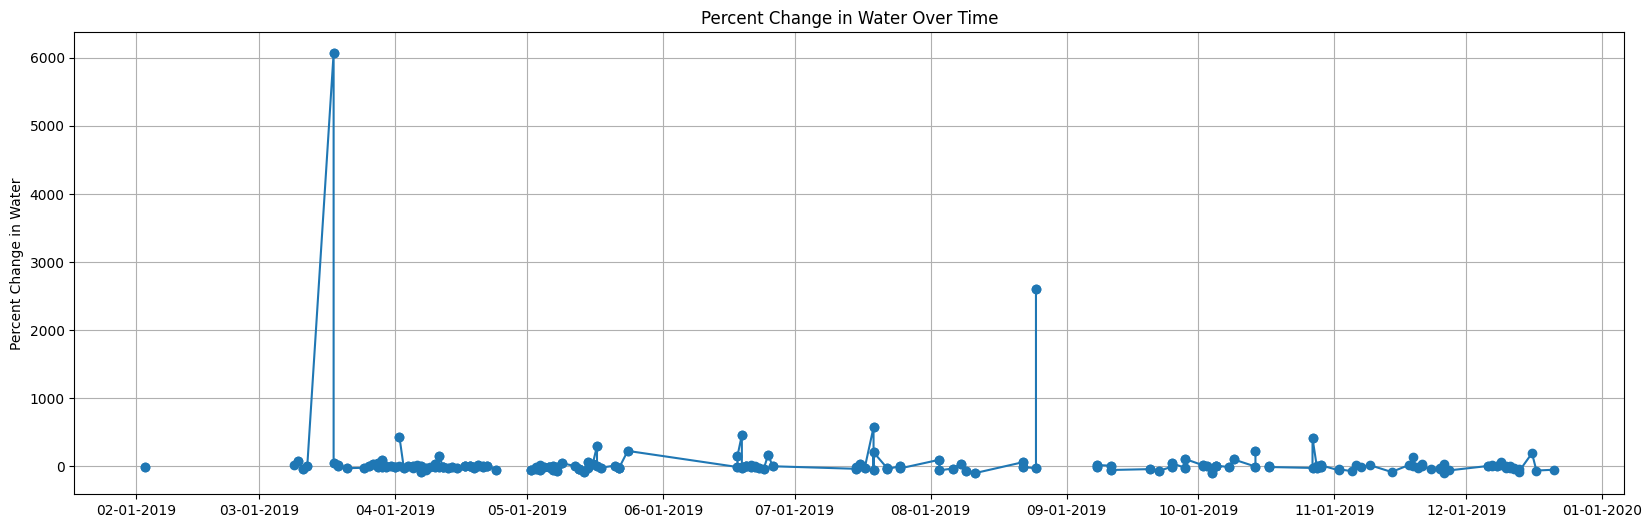

In [39]:
plt.figure(figsize=(20, 6))  # Set the figure size

# %Change in Water Rate column against Effective Date
plt.plot(df_2019_wells.index, df_2019_wells['% Change in Water Rate'], marker='o', linestyle='-')

# Add labels and title

# Format the x-axis tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y')) # format: Month-Day-Year
plt.ylabel('Percent Change in Water')
plt.title('Percent Change in Water Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# GENERIC CODE
# REPLACE WITH NEW DESIRED COLUMNS FROM DESIRED DATAFRAMES (i.e., xls sheet)

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot more desired columns in other dataframes (excel sheets) against the effective date:
plt.plot(df*.index, df[' '], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('*Date*')
plt.ylabel('')
plt.title('*Y* Variation Over Time')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

Forecasting...

In [ ]:
#FROM JOE:

decomposition = seasonal_decompose(df['Temperature'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['Temperature'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='brown')
plt.legend(loc='best')
plt.tight_layout()

# Step 5: Model Selection and Training (e.g., ARIMA)
# ARIMA, SARIMA, ETS, Prophet, etc.

# Step 6: Model Evaluation
# Evaluate the model using appropriate metrics

# Step 7: Forecasting
# Use the trained model to forecast future values

## Train Seasonal ARIMA Model for Forecasting since seasonality for CO2 is expected given agricultural activity, and water injection will correlate:

In [ ]:
# Train Seasonal ARIMA Model for Forecasting since seasonality for CO2 is expected given agricultural activity, and water injection will correlate:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#???    s = winter vs non-winter months

# Define SARIMA parameters
order = (p, d, q)  # Replace with chosen ARIMA order???
seasonal_order = (P, D, Q, s)  # Replace with chosen seasonal order for non-winter months vs winter months (s is the seasonality period)

# Create and fit the SARIMA model
model = SARIMAX(df['Change in Water Rate'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit()

# Make predictions
forecast = fit_model.get_forecast(steps=10)  # Forecast the next 10 steps

#NOTE: "Make sure your time series is stationary (constant mean and variance) before applying ARIMA. Differencing (d parameter) helps achieve stationarity"

## IGNORE BELOW PLEASE! More Data Visualization/Communication of Results


In [ ]:
model_array = np.array(fit_model.fittedvalues)

In [ ]:
df1.head(20)

In [ ]:
forecastdf = pd.DataFrame(forecast)

In [ ]:
forecastdf.info()

In [ ]:
forecastdf.rename(columns={'predicted_mean': 'Water Injection (bbls)'})

In [ ]:
forecastdf.index = pd.date_range("2019-01-01", periods=48, freq="D")

In [ ]:
forecastdf


In [ ]:
print(df_2019.columns)


In [ ]:
Water_Rate_df = df_2019.set_index(df_2019['% Change in Water Rate'], inplace=True)

In [ ]:
Water_Rate.info()

In [ ]:
actualtempdf.index = pd.date_range("2024-03-01", periods=32, freq="15min")

In [ ]:
# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(actualdf,label='Change in Gas Rate', color = 'blue')
plt.plot(forecastdf, label='% Change in Gas Rate', color='red')
plt.title('Percent Change in Gas Rate vs Change in Gas Rate')
plt.xlabel('Change in Gas Rate')
plt.ylabel('Percent Change in Gas Rate')
plt.legend()
plt.show()

from joe

from joe

from joe

from joe

from joe

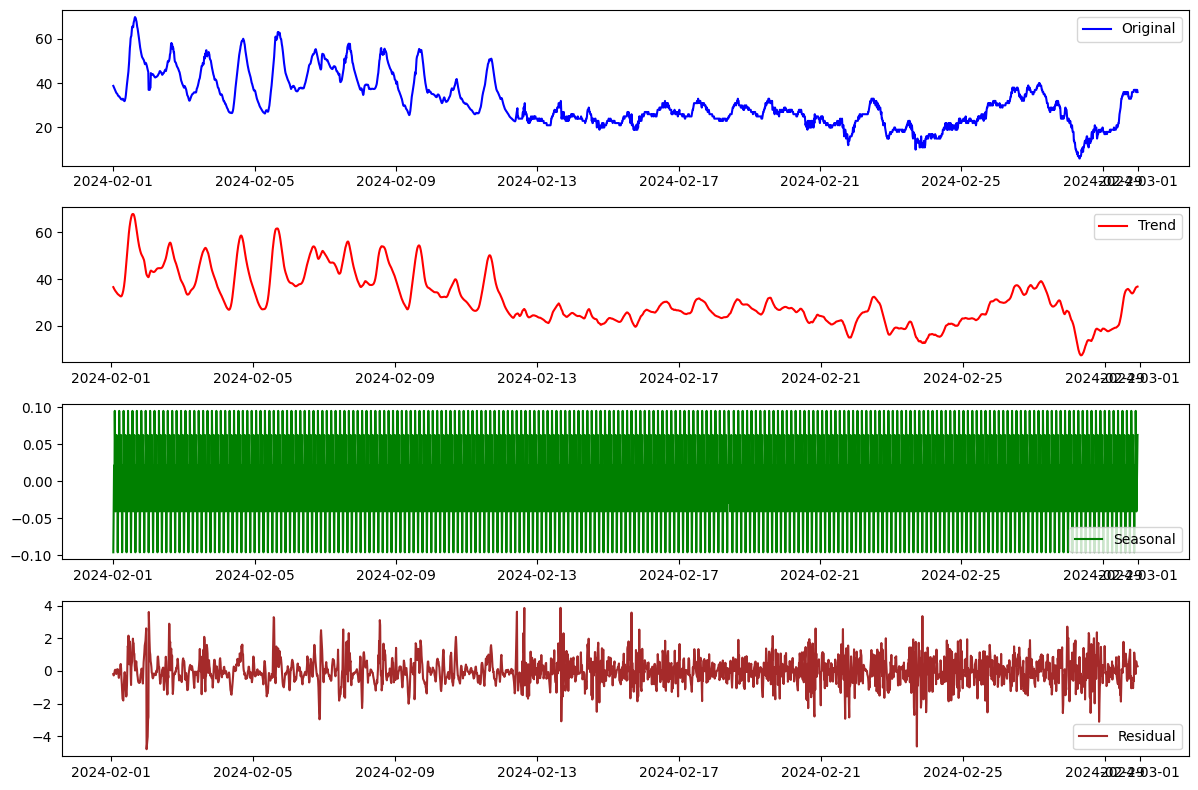

In [ ]:
decomposition = seasonal_decompose(df['Temperature'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
# Plot decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['Temperature'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='brown')
plt.legend(loc='best')
plt.tight_layout()

# Step 5: Model Selection and Training (e.g., ARIMA)
# ARIMA, SARIMA, ETS, Prophet, etc.

# Step 6: Model Evaluation
# Evaluate the model using appropriate metrics

# Step 7: Forecasting
# Use the trained model to forecast future values

In [ ]:
# Train ARIMA Model for Forecasting:

# Fit ARIMA model
model = ARIMA(df['Temperature'], order=(5,1,0))  # Example order, you can tune this
fit_model = model.fit()

# Forecast next 12 time steps
forecast = fit_model.forecast(steps= 48)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
model_array = np.array(fit_model.fittedvalues)

In [ ]:
df1 = df[['Temperature']]

In [ ]:
df1.head(20)

,Temperature
Datetime,
2024-02-01 00:00:00,38.8
2024-02-01 00:15:00,38.4
2024-02-01 00:31:00,38.0
2024-02-01 00:45:00,37.6
2024-02-01 01:00:00,37.1
2024-02-01 01:15:00,36.7
2024-02-01 01:30:00,36.3
2024-02-01 01:45:00,35.9
2024-02-01 02:00:00,35.7


In [ ]:
forecastdf = pd.DataFrame(forecast)

In [ ]:
forecastdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 2782 to 2829
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   predicted_mean  48 non-null     float64
dtypes: float64(1)
memory usage: 516.0 bytes


In [ ]:
forecastdf.rename(columns={'predicted_mean': 'Temperature'})

,Temperature
2782,36.134668
2783,36.099831
2784,35.975185
2785,35.818648
2786,35.717537
2787,35.693524
2788,35.631895
2789,35.575715
2790,35.531509
2791,35.501922


In [ ]:
forecastdf.index = pd.date_range("2024-03-01", periods=48, freq="15min")

In [ ]:
forecastdf


,predicted_mean
2024-03-01 00:00:00,36.134668
2024-03-01 00:15:00,36.099831
2024-03-01 00:30:00,35.975185
2024-03-01 00:45:00,35.818648
2024-03-01 01:00:00,35.717537
2024-03-01 01:15:00,35.693524
2024-03-01 01:30:00,35.631895
2024-03-01 01:45:00,35.575715
2024-03-01 02:00:00,35.531509
2024-03-01 02:15:00,35.501922


In [ ]:
actualtempddf = pd.read_excel('/content/drive/MyDrive/actualtempdf (1).xlsx')

In [ ]:
actualtempddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME         32 non-null     object 
 1   ACTUAL TEMP  32 non-null     float64
dtypes: float64(1), object(1)
memory usage: 640.0+ bytes


In [ ]:
actualtempddf.set_index(actualtempddf['TIME'], inplace=True)

In [ ]:
actualtempddf

,TIME,ACTUAL TEMP
TIME,,
00:00:00,00:00:00,39.5
00:15:00,00:15:00,39.2
00:30:00,00:30:00,38.9
00:45:00,00:45:00,38.6
01:00:00,01:00:00,38.7
01:15:00,01:15:00,38.4
01:30:00,01:30:00,38.1
01:45:00,01:45:00,37.7
02:00:00,02:00:00,37.3


In [ ]:
actualtempdf

TIME
00:00:00    39.5
00:15:00    39.2
00:30:00    38.9
00:45:00    38.6
01:00:00    38.7
01:15:00    38.4
01:30:00    38.1
01:45:00    37.7
02:00:00    37.3
02:15:00    36.9
02:30:00    36.5
02:45:00    36.2
03:00:00    35.7
03:15:00    35.2
03:30:00    34.6
03:45:00    34.3
04:00:00    34.1
04:15:00    33.9
04:30:00    33.7
04:45:00    33.5
05:00:00    33.1
05:15:00    33.0
05:30:00    32.7
05:45:00    32.3
06:00:00    32.0
06:15:00    31.6
06:30:00    31.5
06:45:00    31.3
07:00:00    31.2
07:15:00    31.5
07:30:00    32.1
07:45:00    33.2
Name: ACTUAL TEMP, dtype: float64

In [ ]:
actualtempdf.info()

<class 'pandas.core.series.Series'>
Index: 32 entries, 00:00:00 to 07:45:00
Series name: ACTUAL TEMP
Non-Null Count  Dtype  
--------------  -----  
32 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [ ]:
actualtempdf.index = pd.date_range("2024-03-01", periods=32, freq="15min")

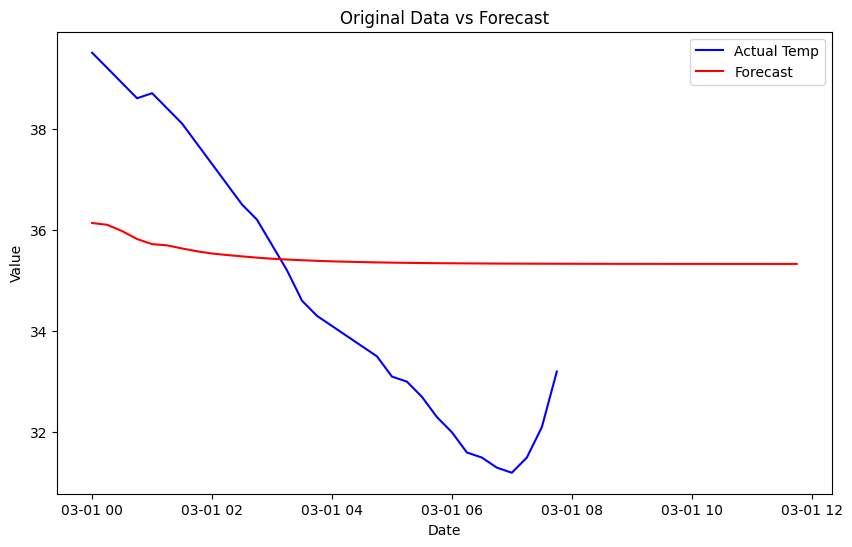

In [ ]:
# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(actualtempdf,label='Actual Temp', color = 'blue')
plt.plot(forecastdf, label='Forecast', color='red')
plt.title('Original Data vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

phind's suggestions for forecasting seasonality:





phind's suggestions for forecasting seasonality:





phind's suggestions for forecasting seasonality:





phind's suggestions for forecasting seasonality:





phind's suggestions for forecasting seasonality:





In [ ]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Water Injection (bbls)'], ax=axes[0])
plot_pacf(df['Water Injection (bbls)'], ax=axes[1])
plt.show()

# Grid search (example)
import itertools

p_values = range(0, 3)  # Example range for p
d_values = range(0, 2)  # Example range for d
q_values = range(0, 3)  # Example range for q

best_aic = float('inf')
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df['Water Injection (bbls)'], order=(p, d, q))
        fit_model = model.fit()
        if fit_model.aic < best_aic:
            best_aic = fit_model.aic
            best_order = (p, d, q)
    except:
        continue

print(f"Best ARIMA order: {best_order}")